In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import os

plb.rcParams['figure.figsize'] = 10, 6


In [2]:
def read_file(filename="image.jpg"):
    if not os.path.exists(filename):
        print(f"❌ Error: File '{filename}' not found. Check the path and try again.")
        return None
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    return img

In [3]:
def edge_mask(img, line_size=7, blur_value=7):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    edges = cv2.adaptiveThreshold(gray_blur, 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY,
                                  line_size, blur_value)
    plt.imshow(edges, cmap='Greys_r')
    plt.title("Edge Image")
    plt.axis('off')
    plt.show()
    return edges

In [4]:
def color_quantization(img, k=9):
    data = np.float32(img).reshape((-1, 3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [5]:
def bilateral_filter_and_combine_edge_mask(q_img, edges, d=7, sigmaColor=200, sigmaSpace=200):
    blurr = cv2.bilateralFilter(q_img, d, sigmaColor, sigmaSpace)
    plt.imshow(blurr)
    plt.title("Blurred Image")
    plt.axis('off')
    plt.show()
    cartoon_img = cv2.bitwise_and(blurr, blurr, mask=edges)
    plt.imshow(cartoon_img)
    plt.title("Cartoon Image")
    plt.axis('off')
    plt.show()
    return cartoon_img

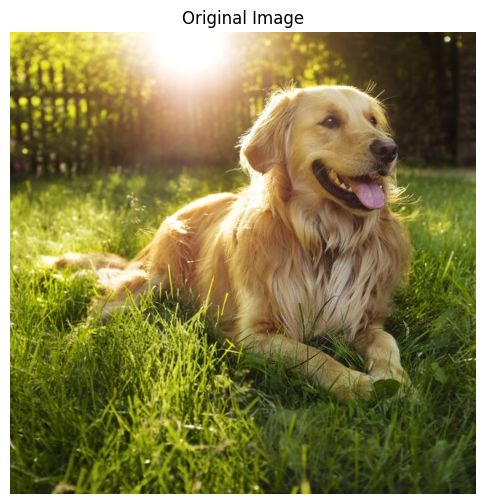


📂 Current working directory: c:\krish\PythonOpenCV
🔍 File exists? -> True


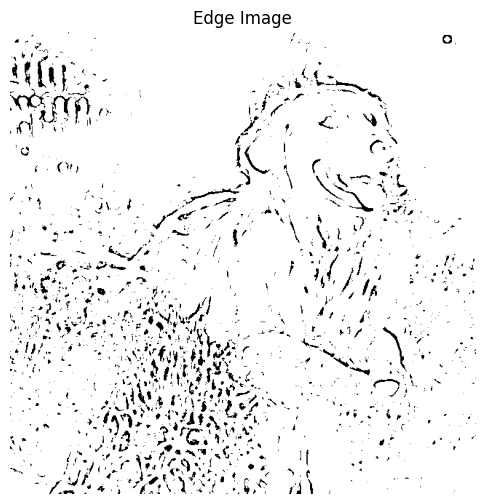

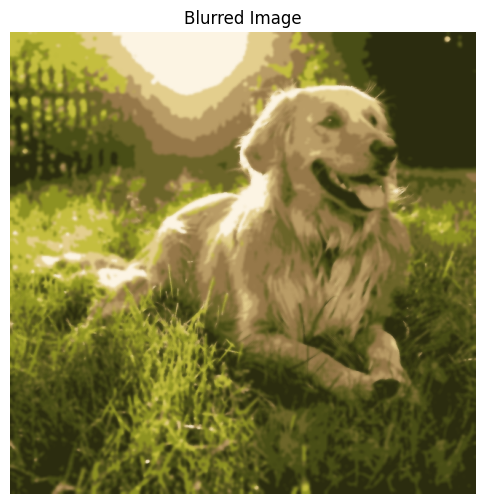

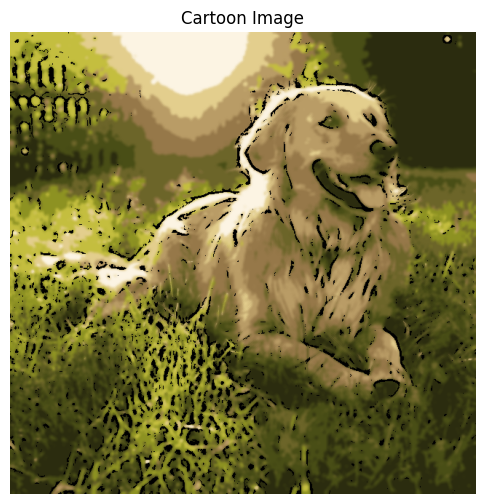

In [6]:
filename = input("Enter image file name or path: ").strip()
img = read_file(filename)
print("\n📂 Current working directory:", os.getcwd())
print("🔍 File exists? ->", os.path.exists(filename))


if img is not None:  # Only proceed if file is loaded
    edges = edge_mask(img)
    quantized_img = color_quantization(img)
    cartoon_img = bilateral_filter_and_combine_edge_mask(quantized_img, edges)